<h1> Some simulations and properties of Galton Watson process</h1>

<h2> Introduction </h2>

<p> This project is about studying simple properties of Galton Watson process. This process can be used in order to solve problems about the development of a population under some conditions. Galton, for example, used it to study the extinction of the names of nobles in the past centuries. <p>

<p> We will basically propose a model to answer this similar problem : Considering that Mr.Jerry Smith is the last male named Smith in the world, what is the probability of the survivance of the Smith male in the next generation ? Can we guess the number of Smith male in ten generations ? <p>

<p> This project needs only basic maths, basic Python library and Monte Carlo simulations, and it was my introduction to the Python language.  <p>

<h2> Definition of the model </h2>

<p> We consider the random variable $(X_n)$ which represents the number of male descendants of Mr. Smith after n generations. So, $X_0=1$ as Jerry Smith is the only Smith male at the beginning, $X_1$ represents the number of sons of Mr. Smith, $X_2$ is grandsons...<p>
* Asumption 1 : $(X_n)$ is a Markov Chain, you only need to know $ X_{n-1}$ to predict $X_n$, even if you have informations about every previous $X_k$ 
* Asumption 2 : we know the probability for a male of every generation $n$ to have $k$ sons, for every $k \in N$. We note this probability $p_k^n$, $(k,n) \in N^2$
* Asumption 3 : Independance between the number of sons of every member of the family

Basically, this means that in our model we do not consider collective behaviours : your probability of having no child is the same if your brothers already have 1 son or 10 sons. We also first consider that all of the laws are known at the beginning of the experience, and that the fact that your father and your grand-father imply no change in your law of probability.

This leads to the following process :

* $ \forall n \in N $ , $ X_{n+1}=\sum_{k=1}^{X_n} Y_k$ , where $ \forall k $ , $Y_k$ is a random variable following $(P_k^n)_{k \in N}$

## First samplings

I first consider that $(p_k^n)$ is constant over the time, and we take the probability law from the french National Institute of Statistics and Economic Studies (Insee). With our data the average number of sons of our individuals will be 1.023. 

I first import the libraries and the law of probability.

In [5]:
import numpy as np
import numpy.random as rd
import scipy.stats as sp
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

P = np.array([0.312,0.416,0.215,0.051,0.006])
Values = np.array([0,1,2,3,4])
nb_mean = sum(P*Values)
nb_sd=np.sqrt(sum(P*Values**2))

print(nb_mean,nb_sd)

def nb_sons_INSEE(nb_fathers) :
    return (rd.choice(Values, p=P, size=nb_fathers))

Probability_law=nb_sons_INSEE

1.023 1.353144486


I first implement a class which allows to create a new generation knowking the informations about the previous generation. I choose to create objects because it seems the easiest way to keep at every time the most informations if I choose to analyze the properties of my process in a second time. 

In [6]:
class generation :
    def __init__(self,previous_gen):
        self.previous_gen = previous_gen
        self.nb_fathers = 1
        if previous_gen != 0 :
               self.nb_fathers = previous_gen.nb_indiv
        self.law=Probability_law
        self.list_indiv=self.law(self.nb_fathers)
        self.nb_indiv=sum(self.list_indiv)

Jerry_sons = generation(0)
Jerry_sons

In [7]:
print("number of sons of Jerry:", Jerry_sons.nb_indiv)

gen1 = generation(Jerry_sons)
print("grandsons :", gen1.list_indiv, "number of grandsons : ", gen1.nb_indiv)

number of sons of Jerry: 1
grandsons : [1] number of grandsons :  1


I know create a class for the sampling of a complete genealogy tree. I add some interesting statistics in the properties of the class.

In [8]:
class Simulation :
    def __init__(self,n):
        self.nb_gen=n
        self.generations=[generation(0)]
        self.generations=self.get_generations(self.generations)
        self.nb_by_gen=self.get_list_nb_indiv()
        self.Is_extinct=(0 in self.nb_by_gen)
        self.extinction_time="Not extinct"
        if self.Is_extinct :
            self.extinction_time=self.nb_by_gen.index(0)
        
    def get_generations(self,G):
        for i in range(self.nb_gen-1):
            G.append(generation(G[-1]))
        return(G)
    
    def get_list_nb_indiv(self):
        L=[1]
        for x in self.generations :
            L.append(x.nb_indiv)
        return(L)
    
    def graph(self):
        colors=["red","blue","green","yellow","purple","navy","pink","orange"]
        plt.plot(self.nb_by_gen,color=rd.choice(colors))
    

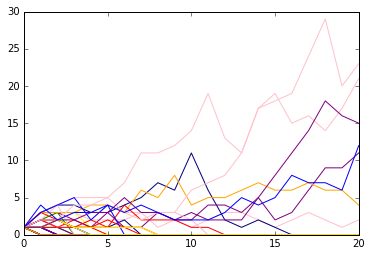

[[True, 1], [False, 'Not extinct'], [True, 1], [True, 1], [True, 2], [True, 5], [True, 3], [True, 2], [True, 7], [True, 3], [True, 5], [True, 1], [True, 1], [True, 16], [True, 3], [False, 'Not extinct'], [True, 2], [False, 'Not extinct'], [True, 1], [True, 4], [False, 'Not extinct'], [True, 1], [True, 1], [True, 1], [True, 1], [True, 1], [True, 3], [True, 8], [True, 4], [True, 2], [True, 2], [True, 7], [True, 4], [True, 12], [True, 1], [True, 1], [True, 11], [True, 1], [True, 1], [True, 2], [True, 1], [True, 6], [True, 1], [True, 8], [False, 'Not extinct'], [True, 1], [True, 1], [True, 4], [False, 'Not extinct'], [False, 'Not extinct']]


In [9]:
Results=[]
for x in range(50) :
    S=Simulation(20)
    S.graph()
    Results.append([S.Is_extinct,S.extinction_time])
plt.show()
print(Results)

Now that we have a class for simulations, we create a new class for Monte Carlo Simulation. What can we observe while simulating a lot of genealogy trees ?

In [10]:
class MC_simul :
    def __init__(self,N,n):
        self.nb_simul=N
        self.nb_gen=n
        self.Simul=self.get_simul(N,n)
        self.Extinct_rate=sum(x.Is_extinct for x in self.Simul)/self.nb_simul
        self.Extinct_times=[x.extinction_time for x in self.Simul]
        self.list_times = list(filter(lambda x: x != "Not extinct", self.Extinct_times))
        self.mean_times = np.mean(self.list_times)
        self.sd_times = np.std(self.list_times)
    
    def get_simul(self,N,n):
        S=[]
        for x in range(N):
            S.append(Simulation(n))
        return(S)
    
    def plot(self):
        for x in self.Simul:
            x.graph()
        plt.show()
    

0.9
[5, 10, 1, 24, 6, 1, 2, 1, 2, 1, 4, 3, 3, 14, 13, 1, 2, 3, 7, 3, 1, 2, 1, 12, 5, 3, 1, 1, 2, 1, 1, 1, 4, 26, 9, 1, 19, 8, 5, 6, 2, 9, 1, 2, 1, 2, 1, 2, 5, 6, 1, 1, 6, 3, 1, 2, 4, 5, 3, 11, 2, 1, 3, 2, 8, 2, 13, 2, 11, 1, 4, 1, 7, 1, 2, 7, 11, 7, 1, 1, 14, 5, 9, 6, 4, 2, 1, 4, 2, 1]
4.64444444444 4.90874754588


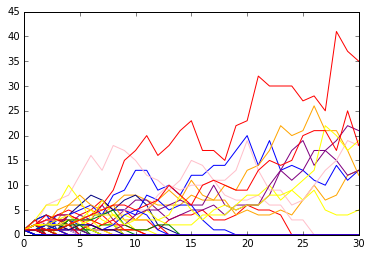

In [11]:
MC_sample=MC_simul(100,30)
print(MC_sample.Extinct_rate)
print(MC_sample.list_times)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()


If we consider our sample of extinction rate as a Monte Carlo estimator for the probability of the extinction of the Smith name, Jerry Smith has only 10% of chance to have a Smith descendant in 30 generations. The average extinction date is after 5 generations, but the standart deviation is very high.

Now we can do the same with different law of probability to check the behaviours of our process behind different probabilities. We can for example use a Poisson law with different means

1.0
1.345 0.701409295633


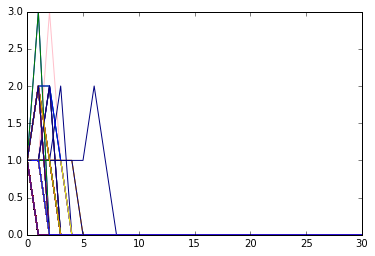

In [12]:
def Poisson_sample(nb_fathers) :
    return (rd.poisson(lambd,size=nb_fathers))

Probability_law=Poisson_sample

lambd= 0.3

MC_sample=MC_simul(1000,30)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()

0.937
4.10992529349 5.16449558191


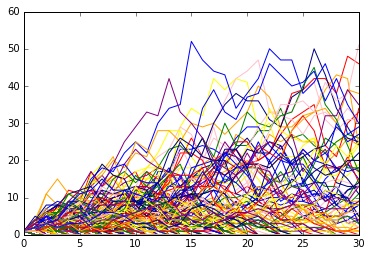

In [13]:
lambd=1

MC_sample=MC_simul(1000,30)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC3=MC_sample.plot()

0.174
1.47126436782 0.814228080387


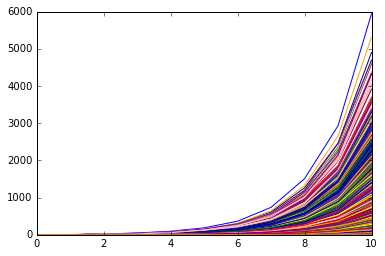

In [14]:
lambd=2

MC_sample=MC_simul(1000,10)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()

Given a law of probability for the number of sons of every individual at every generation, it seems that we are able to give a numerical estimator of the probability of extinction of the family name Smith, and of the expectation and standard deviation we can check out the maths to verify these estimators.

## Mathematical properties

After our first simulations we can guess some properties of the Galton-Watson process. With some parameters for the law of probability of the number of sons the extinction will be sure, with some others some process will lead to extinction and others will grow to very large populations. To demonstrate these properties we will use the main properties of Galton-Watson process : the recursive form of the probability-generating function

### What is a probability-generating function ?

The probability-generating function $g$ of a variable $X$ is given for $ t \in [0,1]$ by $ g_X(t)=E(t^X)$.

For a discrete random variable, that can be written as : $ g_X(t) = \sum_{k=0}^{+\infty} t^k P(X=k) $

One can see that the given form of the function insure the $C^\infty$ (continuous and differentiable at each order). Some basic properties of this function for a discrete variable are that:
* $ g_X(0)=P(X=0)$
* $ g_X(1)=1 $
* $ g_X $ is strictly convex 
* $ E(X)=g_X'(1) $
* $ V(X)= g_X''(1)+g_X'(1)-g_X'(1)^2$

We can now calculate the probability-generating function for ou first law of probability, and for a Poisson Law of parameter $\lambda$.

In [41]:
from scipy import misc
import math

def g_INSEE(t):
    T=np.array([t**k for k in range(len(P))])
    return(sum(T*P))

print(g_INSEE(0), g_INSEE(1))

def g_poisson(t,l):
    return(np.exp(l*(t-1)))

print(round(g_poisson(0,1),3), g_poisson(1,1))
print(round(g_poisson(0,0.5),3), g_poisson(1,0.5))
print(round(g_poisson(0,1.5),3), g_poisson(1,1.5))

0.312 1.0
0.368 1.0
0.607 1.0
0.223 1.0


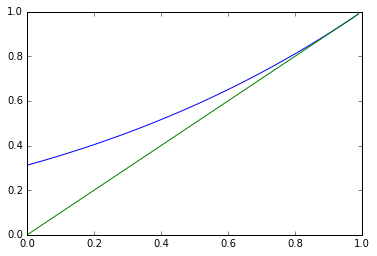

In [48]:
T=np.arange(0,1,0.01)
plt.plot(T,[g_INSEE(t) for t in T], color='blue')
plt.plot(T,T,color='green')

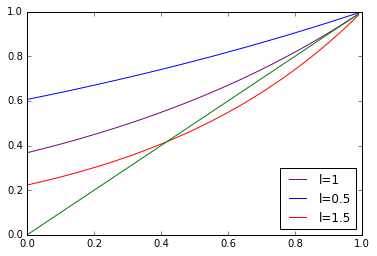

In [63]:
plt.plot(T,[g_poisson(t,1) for t in T],color='purple',label='l=1')
plt.plot(T,[g_poisson(t,0.5) for t in T],color='blue',label='l=0.5')
plt.plot(T,[g_poisson(t,1.5) for t in T],color='red',label='l=1.5')
plt.plot(T,T,color='green')
plt.legend(loc=4)

### Probability-generating function for Galton-Watson process

The most powerful property of Galton-Waltson process is that the generating function of the process at any time can be defined with a recursive formula.

Indeed, we first note that $g_{X_0}(t)=t$ as $X_0=1$, and $g_{X_1}(t)=E(t^{X_1})=E(t^{Y_1})=g_Y(t) $.

Now at a time $n$ : $ g_{X_{n+1}}(t) = E(t^{\sum_{i=1}^{X_n} Y_{i,n}})= E (E(t^{\sum_{i=1}^{X_n} Y_{i,n}} | X_n))  $

With : $$E(t^{\sum_{i=1}^{X_n} Y_i} | X_n)=E(t^{Y_1})^{X_n}=g_Y(t)^{X_n} $$  with the indepence of the $(Y_i)$

Finally : $$ g_{X_{n+1}}(t) = E(g_Y(t)^{X_n}) = g_{X_n}(g_Y(t))$$

If we compute this formula using $g_{X_1}(t)=g_Y(t)$, and noting $g^{(n)}=g \circ g \circ g \circ...\circ g$ $n$ times, and $g^{(0)}=t$ :
* $$ g_{X_n}(t)=g_Y^{(n)}(t)$$

That means that if we know the probability-generating function of the distribution of thee number of sons per individual, we can compute the probqbility-generating function of $X_n$ at any time $n$, which characterizes perfectly the distribution of $X_n$. Let see what happens when we apply this formula to our previous distributions.

In [78]:
def compute_gen_f(g,n,t):
    if n==0:
        return(t)
    else:
        for i in range(n):
            t=g(t)
    return(t)

compute_gen_f(g_INSEE,10000,0)

0.94245744370515638

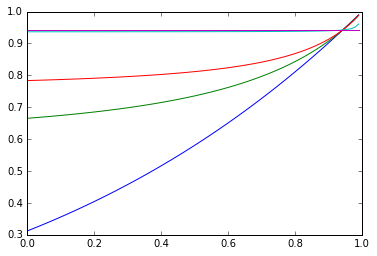

In [81]:
plt.plot(T,[compute_gen_f(g_INSEE,1,t) for t in T])
plt.plot(T,[compute_gen_f(g_INSEE,5,t) for t in T])
plt.plot(T,[compute_gen_f(g_INSEE,10,t) for t in T])
plt.plot(T,[compute_gen_f(g_INSEE,100,t) for t in T])
plt.plot(T,[compute_gen_f(g_INSEE,1000,t) for t in T])

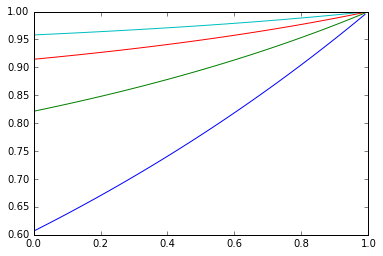

In [83]:
def g_p0(t):
    return(g_poisson(t,0.5))

plt.plot(T,[compute_gen_f(g_p0,1,t) for t in T])
plt.plot(T,[compute_gen_f(g_p0,2,t) for t in T])
plt.plot(T,[compute_gen_f(g_p0,3,t) for t in T])
plt.plot(T,[compute_gen_f(g_p0,4,t) for t in T])
plt.plot(T,[compute_gen_f(g_p0,10,t) for t in T])

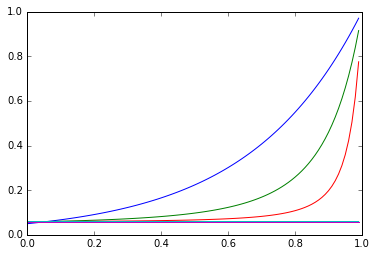

In [94]:
def g_p1(t):
    return(g_poisson(t,1))

def g_p2(t):
    return(g_poisson(t,3))

plt.plot(T,[compute_gen_f(g_p2,1,t) for t in T])
plt.plot(T,[compute_gen_f(g_p2,2,t) for t in T])
plt.plot(T,[compute_gen_f(g_p2,3,t) for t in T])
plt.plot(T,[compute_gen_f(g_p2,10,t) for t in T])
plt.plot(T,[compute_gen_f(g_p2,100,t) for t in T])

What we observe is that it seems that in every example there is a convergence of the probability-generating function with increasing $n$. In the examples where the mean is lower than $1$ the generating function converges to $t \rightarrow 1$ as $P(X_n=0) \rightarrow 1$. When the mean is upper than one it seems that the function slope tends to 0 for the value $<1$ and $+\infty$ when approaching 1. That would mean that there is a convergence of the probability of $X_n=0$, and that the probability that $X_n=k$, whith a finite value $k$ tends to $0$ too. Basically, that means that when $n \rightarrow +\infty$ the "value" of the process is $0$ or $+ \infty$. Now we can prove it mathematically.

### Explicit calculus of the expectation and variance of the process at each time

We can use the recursive form of the generating function to compute the mean and variance for each generation.
* $E(X_0)=1$
* $E(X_1)=g'(1)=m$
* $V(X_1)=\sigma^2$, which is known as we know the distribution of $Y$
* $\forall n \in N$, $ E(X_n)=(g^{(n)})'(1) $
* $ V(X_n)= (g_{X_n}^{(n)})"(1)+(g_{X_n}^{(n)})'(1)-(g_{X_n}^{(n)})'(1)^2$

If we compute we obtain :
* $$E(X_{n+1})=g'(1)*(g^{(n)})'(1) \Rightarrow E(X_n)=m^n$$
* Using from Wald $$ V(X_n) = \sigma^2m^{n-1}+m^2V(X_{n-1})$$ , we finally obtain : $$ V(X_n)=\sigma^2 m^{n-1} \frac{1-m^n}{1-m}$$ if $m \neq 1$
 $$V(X_n)=n\sigma^2$$ if $m=1$

Note that $E(X_n)$ and $V_{X_n}$ both converges to $0$ if $m<1$ and $+ \infty$ if $m>1$. If $m=1$ the expectation is always 1 but the variance tends to $+\infty$

This leads to a major distinction between the different Galton-Watson process (with an invariant law of probability):
* $m>1$ is the supercritical case
* $m=1$ is the critical case
* $m<1$ is the subcritical case

We are going to use this distinction while exploring further properties of the process.

### Probability of extinction and extinction time

Now it is time to answer our first question : what is the probability that the Smith name in the future generations ? In terms of probability, it is easier to check the probability of extinction, that can be written as following :
$$ P(\bigcup_{n=1}^{+\infty} ({X_n=0}))$$

But by definition, if $X_N=0$, then $\forall n>N$, $X_n=0$

So, a basic probability theorem allows us to rewrite  $$ P(\bigcup_{n=1}^{+\infty} ({X_n=0}))= lim_{N->+\infty} P(X_N=0)$$

But we know with the generating-function properties of $X_n$ that $P(X_n=0)=g^{(n)}(0)$

As we work in a probability space, the existence of $q=lim_{N->+\infty} P(X_N=0)$ is insured. Then : 

$$ q=lim_{N->+\infty} P(X_N=0)=lim_{N->+\infty} P(X_{N+1}=0)=lim_{N->+\infty} g(P(X_n=0))=g(q)$$ as g is continuous

So we have $q=g(q)$, q is a fixed point of the function g.

Note that the $1$ is a fixed point of $g$ by definition. Are there other fixed points in $[0,1[$ ?

We have to study $f:x \rightarrow g(x)- x$. f is convex, and its derivative is $f': x \rightarrow g'(x)-1$.

As $f$ strictly is convex, $f'$ is strictly increasing. We know that $g'(1)=E(Y)$, and that $f(0)=P(Y=0)>0$ and $f(1)=0$

Now we call $E(Y)=m$, Two situations can be distinguished :

* $m\leq1$ : $f'(t)<0$ at any time, so $f$ is strictly decrescent and the only fixed point is 1
* $m>1$ : $f$ is decreasing then increasing. As $f'$ is positive when approaching 1 that means that g is under $x\rightarrow x$ : The intermediate values theorem insure the existence of only one fixed point strictly in $[0,1[$ 

If we consider the case $m>1$ : there are two possibilities for $q$, $q=1$ or $q=q'<1$.

If we assume $q=1$ : $P(X_n=0)\overset{n\to+\infty}{\longrightarrow} 1 $, that means the convergence in probability of $(X_n)$ to 0 when $n \rightarrow + \infty$. 

That implies the $L^1$ convergence, which means that $lim_{n \rightarrow + \infty} E(X_n)=0$. 

But we know that $E(x_n)=m^n>0$, $ \forall n$ as $m>1$. That's impossible, so $q \neq 1$, $q=q'$.

$\underline{\textbf{Conclusion :}}$ the probability of extinction $q$ of the Galton Watson process is the smallest fixed point of the probability-generating function $g_Y$ on $[0,1]$

Now it seems really easier to compute this probability. We directly know that in the supercritical and the critical case the extinction is P-a.s. In the subcritical case we can find easily the probability with a simple programm.

In [95]:
from scipy import optimize as op

print(op.fixed_point(g_INSEE, x0=0))
print(op.fixed_point(g_p0,x0=0))
print(op.fixed_point(g_p1,x0=0))
print(op.fixed_point(g_p2,x0=0))

0.9424574437050629
1.0
0.9999969052259254
0.059520209292640375


In our first simulations we could make the hypothesis that the probability of extinction of the name of Jerry Smith was more that 90%, now we are sure that it is 94,2% with this law of probability. We also check that the probability of extinction is 1 with $\lambda =1$ for a Poisson law (with numerical approximations).